# Time Series: Exploratory Analysis Exercises

_______


### Do your work for this exercise in a notebook named `explore`. Use the techniques in the lesson to explore the ***store item demand dataset and the opsd dataset.***

> - For the **store item demand data**, you will need to choose a method of aggregating such that each observation is a unique date. 
>- For both datasets you should choose a method of splitting your data and only explore the training split.

In [22]:
import acquire
import prepare

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.ion()

## Store Items Dataset

In [ ]:
items_df = acquire.combine_sales_stores_items_data()
items_df.head()

In [10]:
# reassign the sale_date column to be a datetime type
items_df.sale_date = pd.to_datetime(items_df.sale_date)

# set the index and sort, so that we know it's in chronological order.
items_df = items_df.set_index('sale_date').sort_index()

# is it correct?
items_df.index.min(), items_df.index.max()

(Timestamp('2013-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2017-12-31 00:00:00+0000', tz='UTC'))

In [11]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   store_address  913000 non-null  object 
 5   store_city     913000 non-null  object 
 6   store_id       913000 non-null  int64  
 7   store_state    913000 non-null  object 
 8   store_zipcode  913000 non-null  object 
 9   item_brand     365200 non-null  object 
 10  item_id        365200 non-null  float64
 11  item_name      365200 non-null  object 
 12  item_price     365200 non-null  float64
 13  item_upc12     365200 non-null  object 
 14  item_upc14     365200 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 111.5+ MB


____

### Train Test Split 
- Train will be all data before the last year of data
- Test will be last year of data

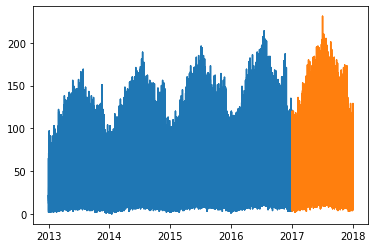

In [13]:
train = items_df.loc[:'2016'] # includes 2016
test = items_df.loc['2017']

plt.plot(train.index, train.sale_amount);
plt.plot(test.index, test.sale_amount);

In [14]:
train.shape, test.shape

((730500, 15), (182500, 15))

In [15]:
# for ease of use, renaming sale_amount to y
y = train.sale_amount
y.head()

sale_date
2013-01-01 00:00:00+00:00    13.0
2013-01-01 00:00:00+00:00    26.0
2013-01-01 00:00:00+00:00    27.0
2013-01-01 00:00:00+00:00    54.0
2013-01-01 00:00:00+00:00    35.0
Name: sale_amount, dtype: float64

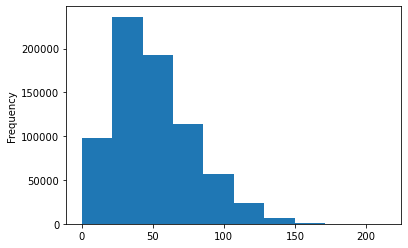

In [16]:
# the distribution of our target variable (sale_amount)
y.plot.hist();

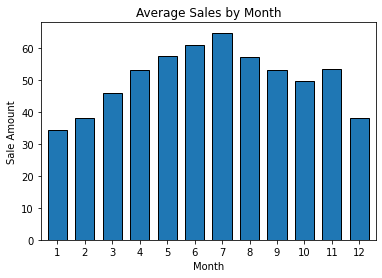

In [21]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.7, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Month', xlabel='Month', ylabel='Sale Amount');

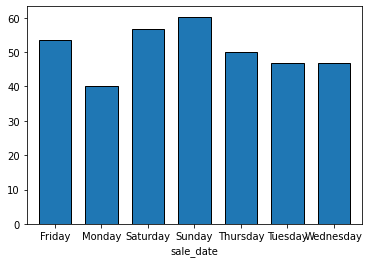

In [20]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.7, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Weekday', xlabel='Weekday', ylabel='Sales Amount');

In [ ]:
y.plot();

In [ ]:
y.resample('M').mean().plot(title='Monthly average');

In [ ]:
y.resample('2W').mean().plot(title='2 week average');

In [ ]:
#y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend();

In [ ]:
#y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend();

In [ ]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sales');

In [ ]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in sales');

In [ ]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot');

In [ ]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0);

In [ ]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1');

In [ ]:
train['y(t + 1)'] = train.sale_amount.shift(-1)
ax = train.plot.scatter(x='sale_amount', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1');

In [ ]:
pd.plotting.autocorrelation_plot(train.sale_amount.resample('W').mean());

In [ ]:
import statsmodels.api as sm

y = train.sale_amount.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head();

In [ ]:
decomposition.iloc[:, 1:].plot();

In [ ]:
result.plot();

____


## OPS Dataset